In [2]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data


files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       


prices=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    priceData = get_price_data(param)
    stock = StockDataFrame.retype(priceData)
    price = pd.DataFrame(stock)
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    stock.get(string)
    price = stock
    print(price)
    
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #

    prices.append(price)


/home/andrea/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


                         open      high       low     close   volume  \
2017-08-14 21:45:00  159.4792  159.6300  158.7700  159.0900  1400128   
2017-08-14 22:00:00  159.1000  159.3800  158.9000  159.2650  1009525   
2017-08-14 22:15:00  159.2700  159.7300  159.2050  159.2200  1104813   
2017-08-14 22:30:00  159.2152  159.4353  159.2150  159.2600   546638   
2017-08-14 22:45:00  159.2600  159.5300  159.2600  159.4350   556516   
2017-08-14 23:00:00  159.4400  159.6000  159.3200  159.5040   562634   
2017-08-14 23:15:00  159.5000  159.5067  159.2100  159.3000   478202   
2017-08-14 23:30:00  159.2950  159.5000  159.1500  159.4646   537703   
2017-08-14 23:45:00  159.4800  159.5000  159.2500  159.2700   338905   
2017-08-15 00:00:00  159.2700  159.3800  159.2000  159.3200   372649   
2017-08-15 00:15:00  159.3200  159.4200  159.1300  159.1400   353429   
2017-08-15 00:30:00  159.1499  159.3100  159.0800  159.1576   278415   
2017-08-15 00:45:00  159.1600  159.2500  159.0500  159.2000   31

                          open       high        low      close  volume  \
2017-08-14 21:45:00   978.5300   981.9200   977.6600   977.6900  165739   
2017-08-14 22:00:00   977.9500   980.0000   976.1900   978.9990  153670   
2017-08-14 22:15:00   978.8280   980.5000   978.7052   979.9000   90104   
2017-08-14 22:30:00   979.9999   984.4900   979.9999   983.6200  151838   
2017-08-14 22:45:00   983.5491   984.3690   983.0000   983.6700   91582   
2017-08-14 23:00:00   983.8100   985.5000   983.5100   983.9400   94056   
2017-08-14 23:15:00   983.7439   984.2000   983.0901   983.9850   30618   
2017-08-14 23:30:00   984.3800   984.3800   981.6800   982.7900   84051   
2017-08-14 23:45:00   982.9700   983.7400   981.7800   981.8700   45156   
2017-08-15 00:00:00   982.0800   982.3900   980.6300   981.7600   55806   
2017-08-15 00:15:00   981.7200   983.0000   981.4200   982.4400   61109   
2017-08-15 00:30:00   982.8100   982.8600   981.3900   981.7600   54881   
2017-08-15 00:45:00   981

                         open      high       low     close   volume  \
2017-12-20 22:30:00  118.6600  118.7100  118.6600  118.7000    43248   
2017-12-20 22:45:00  118.9500  119.1200  117.5600  117.8200    69261   
2017-12-20 23:00:00  117.8200  118.3200  117.7700  118.2300   163492   
2017-12-20 23:15:00  118.2200  118.4200  118.0900  118.1800    49993   
2017-12-20 23:30:00  118.1800  118.2452  118.0600  118.2400    40796   
2017-12-20 23:45:00  118.2400  118.2500  118.0000  118.1000    43877   
2017-12-21 00:00:00  118.1300  118.2400  118.0500  118.1200    41672   
2017-12-21 00:15:00  118.1101  118.2100  118.0600  118.0600    32619   
2017-12-21 00:30:00  118.0874  118.1400  117.9200  118.0899    28223   
2017-12-21 00:45:00  118.0900  118.0900  117.9300  118.0500    31569   
2017-12-21 01:00:00  118.0500  118.1700  117.9900  118.0050    28177   
2017-12-21 01:15:00  118.0108  118.0900  117.9000  118.0000    87431   
2017-12-21 01:30:00  117.9850  118.1000  117.9850  118.0200    4

                          open       high        low      close  volume  \
2017-08-14 21:45:00   940.1200   941.0400   936.8300   937.5400   58321   
2017-08-14 22:00:00   937.5400   937.9700   934.4850   936.5900   54367   
2017-08-14 22:15:00   936.9849   939.0600   936.8000   937.5300   37324   
2017-08-14 22:30:00   937.8700   938.9900   937.7100   938.2600   18197   
2017-08-14 22:45:00   938.4700   939.0320   938.2500   939.0320   18797   
2017-08-14 23:00:00   939.1026   940.6400   938.6600   938.9400   23105   
2017-08-14 23:15:00   938.7200   939.1804   937.2528   937.5100   22796   
2017-08-14 23:30:00   937.4700   938.4800   936.3500   938.0600   17757   
2017-08-14 23:45:00   938.1600   939.4000   938.0300   938.0300   20762   
2017-08-15 00:00:00   938.5400   939.4800   938.4037   939.3700   15615   
2017-08-15 00:15:00   939.1890   939.9500   939.0900   939.2050   15381   
2017-08-15 00:30:00   939.2500   939.8000   938.6945   938.6945   13825   
2017-08-15 00:45:00   938

                         open      high       low     close   volume  \
2017-08-14 21:45:00   73.2400   73.5400   73.1300   73.4100  1251715   
2017-08-14 22:00:00   73.4200   73.4600   73.2307   73.3200   706012   
2017-08-14 22:15:00   73.3250   73.5400   73.3201   73.3700   805056   
2017-08-14 22:30:00   73.3700   73.4800   73.3650   73.4443   449097   
2017-08-14 22:45:00   73.4400   73.6400   73.4100   73.6290   621930   
2017-08-14 23:00:00   73.6300   73.6700   73.5300   73.5301   499810   
2017-08-14 23:15:00   73.5300   73.6100   73.5200   73.6037   367909   
2017-08-14 23:30:00   73.6050   73.6100   73.4900   73.5613   416377   
2017-08-14 23:45:00   73.5650   73.6000   73.5200   73.5300   404542   
2017-08-15 00:00:00   73.5400   73.5700   73.4700   73.5000   375838   
2017-08-15 00:15:00   73.5000   73.5800   73.4800   73.5600   316364   
2017-08-15 00:30:00   73.5600   73.6000   73.5200   73.5300   274514   
2017-08-15 00:45:00   73.5350   73.5500   73.4900   73.5400   26

                         open      high       low     close   volume  \
2017-08-14 21:45:00  169.7600  169.9800  169.5500  169.6600   546188   
2017-08-14 22:00:00  169.6798  169.9500  169.2900  169.8800   651483   
2017-08-14 22:15:00  169.8850  170.4900  169.8850  170.2600   870655   
2017-08-14 22:30:00  170.2600  170.9700  170.2600  170.5900   774877   
2017-08-14 22:45:00  170.5900  170.8852  170.5000  170.7200   462831   
2017-08-14 23:00:00  170.7250  170.9600  170.5900  170.6200   475164   
2017-08-14 23:15:00  170.6300  170.8000  170.5100  170.7900   267672   
2017-08-14 23:30:00  170.7800  170.7881  170.3400  170.6100   299146   
2017-08-14 23:45:00  170.6200  170.7400  170.2700  170.3100   279571   
2017-08-15 00:00:00  170.2700  170.4600  170.2300  170.3600   323025   
2017-08-15 00:15:00  170.3666  170.5099  170.2900  170.3400   250392   
2017-08-15 00:30:00  170.3400  170.6000  170.3300  170.4780   189451   
2017-08-15 00:45:00  170.4900  170.5600  170.2400  170.5500   21

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  36.1150  36.2200  36.0900  36.2000   388611     36.20000   
2017-08-14 22:00:00  36.2000  36.2600  36.1750  36.1850   661223     36.19250   
2017-08-14 22:15:00  36.1850  36.2800  36.1500  36.2650   571555     36.22500   
2017-08-14 22:30:00  36.2650  36.3400  36.2500  36.2993   544363     36.28215   
2017-08-14 22:45:00  36.2913  36.3200  36.2550  36.3100   334575     36.30465   
2017-08-14 23:00:00  36.3050  36.3250  36.2200  36.2250   594007     36.26750   
2017-08-14 23:15:00  36.2250  36.2250  36.1400  36.1600   882204     36.19250   
2017-08-14 23:30:00  36.1600  36.2400  36.1300  36.2250   504769     36.19250   
2017-08-14 23:45:00  36.2300  36.3100  36.2300  36.3050   280559     36.26500   
2017-08-15 00:00:00  36.3050  36.3600  36.3000  36.3550   405562     36.33000   
2017-08-15 00:15:00  36.3600  36.4300  36.3500  36.4050   742210     36.38000   
2017-08-15 00:30:00  36.4050

                        open     high     low    close   volume  close_2_sma  \
2017-08-14 21:45:00  31.6900  31.7700  31.670  31.7650   586194     31.76500   
2017-08-14 22:00:00  31.7700  31.8300  31.740  31.7700  1059200     31.76750   
2017-08-14 22:15:00  31.7700  31.8300  31.750  31.8000   731919     31.78500   
2017-08-14 22:30:00  31.8000  31.8700  31.800  31.8700   535278     31.83500   
2017-08-14 22:45:00  31.8700  31.8900  31.810  31.8408  1123609     31.85540   
2017-08-14 23:00:00  31.8500  31.8800  31.843  31.8500   332124     31.84540   
2017-08-14 23:15:00  31.8500  31.8800  31.830  31.8700   423440     31.86000   
2017-08-14 23:30:00  31.8650  31.8700  31.810  31.8550   596005     31.86250   
2017-08-14 23:45:00  31.8550  31.8600  31.780  31.7910   498125     31.82300   
2017-08-15 00:00:00  31.7950  31.8100  31.760  31.7650   505012     31.77800   
2017-08-15 00:15:00  31.7650  31.8100  31.760  31.7950   696789     31.78000   
2017-08-15 00:30:00  31.7900  31.8100  3

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  41.5300  41.6700  41.4950  41.6700   410176     41.67000   
2017-08-14 22:00:00  41.6700  41.7100  41.6000  41.6750   507186     41.67250   
2017-08-14 22:15:00  41.6800  41.7950  41.6100  41.6600   564393     41.66750   
2017-08-14 22:30:00  41.6600  41.7563  41.6500  41.7450   338237     41.70250   
2017-08-14 22:45:00  41.7500  41.8350  41.7450  41.8200   372063     41.78250   
2017-08-14 23:00:00  41.8300  41.9100  41.8000  41.8300   345577     41.82500   
2017-08-14 23:15:00  41.8350  41.8500  41.6800  41.6800   616747     41.75500   
2017-08-14 23:30:00  41.6800  41.6950  41.5700  41.6100   337072     41.64500   
2017-08-14 23:45:00  41.6100  41.6400  41.5600  41.5850   336676     41.59750   
2017-08-15 00:00:00  41.5850  41.6500  41.5500  41.6300   423217     41.60750   
2017-08-15 00:15:00  41.6390  41.7550  41.6200  41.7500   327471     41.69000   
2017-08-15 00:30:00  41.7450

                         open      high       low     close   volume  \
2017-08-14 21:45:00  160.4700  161.7400  160.2700  160.8900  1675393   
2017-08-14 22:00:00  160.9000  162.0700  160.6000  161.2400  1909191   
2017-08-14 22:15:00  161.2400  162.4500  161.0300  161.9310  1479158   
2017-08-14 22:30:00  161.9600  162.6900  161.7710  162.1478  1187131   
2017-08-14 22:45:00  162.1600  162.4700  161.7500  161.8800   781932   
2017-08-14 23:00:00  161.8900  162.4900  161.7000  161.8720   997672   
2017-08-14 23:15:00  161.8900  163.3600  161.8900  163.3236  1052889   
2017-08-14 23:30:00  163.3133  164.0900  162.9500  164.0768  1176159   
2017-08-14 23:45:00  164.0600  164.3500  163.7600  163.8650   882143   
2017-08-15 00:00:00  163.8400  164.7000  163.6800  164.4015   964533   
2017-08-15 00:15:00  164.4051  165.2200  164.0600  165.0000  1289616   
2017-08-15 00:30:00  164.9600  165.5000  164.7100  165.1477  1000995   
2017-08-15 00:45:00  165.1548  165.8100  165.0410  165.2810   95

                         open      high       low     close   volume  \
2017-08-14 21:45:00  170.7255  171.2900  169.7200  170.2400   397982   
2017-08-14 22:00:00  170.1500  170.3200  169.1600  169.5731   401288   
2017-08-14 22:15:00  169.6200  169.7600  168.8000  169.0150   475729   
2017-08-14 22:30:00  169.0000  170.5000  168.9500  169.9480   506537   
2017-08-14 22:45:00  169.9999  171.4400  169.9800  171.2786   380495   
2017-08-14 23:00:00  171.2800  172.4500  171.2780  171.2900   428698   
2017-08-14 23:15:00  171.2600  171.4400  170.7600  171.0350   282036   
2017-08-14 23:30:00  170.9950  171.1600  170.8000  171.0700   126353   
2017-08-14 23:45:00  171.0800  171.3500  170.3100  170.3600   186056   
2017-08-15 00:00:00  170.3300  170.6000  169.8900  170.0604   196438   
2017-08-15 00:15:00  170.0660  170.1400  169.6100  169.8000   186358   
2017-08-15 00:30:00  169.8199  170.3200  169.8199  170.0500   149169   
2017-08-15 00:45:00  170.0773  170.2900  169.9500  170.2568   11

                          open       high        low      close  volume  \
2018-02-27 22:30:00  1884.0000  1884.0000  1884.0000  1884.0000    3311   
2018-02-27 22:45:00  1870.0200  1919.0000  1870.0200  1904.2000    9567   
2018-02-27 23:00:00  1902.2450  1912.2650  1896.8650  1897.9900   21868   
2018-02-27 23:15:00  1902.8100  1903.0100  1892.9200  1892.9200   12981   
2018-02-27 23:30:00  1892.9300  1897.0000  1892.7550  1895.5500    9370   
2018-02-27 23:45:00  1895.4600  1907.8900  1894.3450  1901.8500   10115   
2018-02-28 00:00:00  1902.2100  1907.7600  1896.4850  1903.7000    7035   
2018-02-28 00:15:00  1905.7100  1905.7100  1899.6800  1900.5100    8788   
2018-02-28 00:30:00  1903.2399  1903.2399  1894.5100  1897.0100    4718   
2018-02-28 00:45:00  1900.0000  1903.0800  1896.5000  1900.4000    5424   
2018-02-28 01:00:00  1900.2300  1902.4700  1899.4100  1900.0000    6926   
2018-02-28 01:15:00  1900.4200  1902.9100  1899.7200  1900.4400    7972   
2018-02-28 01:30:00  1899

                         open      high       low     close  volume  \
2017-08-14 21:45:00  148.0000  148.4700  147.9100  148.2900   37870   
2017-08-14 22:00:00  148.3500  148.6300  148.1301  148.4700   32722   
2017-08-14 22:15:00  148.4475  148.9500  148.3400  148.7259   20428   
2017-08-14 22:30:00  148.7072  149.0500  148.6200  148.8150   25535   
2017-08-14 22:45:00  148.8500  149.0500  148.6700  148.8900   20850   
2017-08-14 23:00:00  148.9300  149.1400  148.8600  148.8600   19725   
2017-08-14 23:15:00  148.8200  149.2300  148.7900  149.1400   32766   
2017-08-14 23:30:00  149.1900  149.1900  148.7850  148.8200   41365   
2017-08-14 23:45:00  148.8500  149.0900  148.7100  148.7700   16851   
2017-08-15 00:00:00  148.8100  149.0700  148.7300  149.0700   16278   
2017-08-15 00:15:00  149.0500  149.2200  148.9400  149.1048   20958   
2017-08-15 00:30:00  149.1300  149.2050  148.9900  149.1104   18798   
2017-08-15 00:45:00  149.0950  149.1887  148.9100  149.0960   19508   
2017-0

                         open      high       low     close  volume  \
2017-08-14 21:45:00  171.2100  171.3300  170.3220  170.9700   44676   
2017-08-14 22:00:00  170.8700  170.9700  170.5300  170.5850   38303   
2017-08-14 22:15:00  170.5850  170.8900  170.5500  170.7380   44732   
2017-08-14 22:30:00  170.8090  170.9300  170.6700  170.8250   44691   
2017-08-14 22:45:00  170.7600  170.9400  170.7100  170.7900   29700   
2017-08-14 23:00:00  170.7850  171.5650  170.7850  171.2400   49386   
2017-08-14 23:15:00  171.1900  171.2600  171.0100  171.2500   54961   
2017-08-14 23:30:00  171.2500  171.2900  170.9800  170.9800   38673   
2017-08-14 23:45:00  171.0000  171.2200  170.9800  171.1601   38082   
2017-08-15 00:00:00  171.1950  171.5500  171.1500  171.5000   42141   
2017-08-15 00:15:00  171.5300  171.7900  171.4600  171.4900   46899   
2017-08-15 00:30:00  171.4910  171.5100  171.3300  171.3500   29374   
2017-08-15 00:45:00  171.3500  171.5400  171.2800  171.4800   24331   
2017-0

                         open     high       low     close  volume  \
2017-08-14 21:45:00   81.6700   81.870   81.4400   81.6300  179201   
2017-08-14 22:00:00   81.5600   82.160   81.5000   82.0800  233166   
2017-08-14 22:15:00   82.0900   82.120   81.9800   82.0000  257140   
2017-08-14 22:30:00   82.0000   82.010   81.7600   81.7700  138358   
2017-08-14 22:45:00   81.7500   81.920   81.7000   81.8900  111531   
2017-08-14 23:00:00   81.8900   82.080   81.8300   81.8400   39896   
2017-08-14 23:15:00   81.8200   81.880   81.7600   81.8194   43219   
2017-08-14 23:30:00   81.8014   81.810   81.6900   81.7700   35348   
2017-08-14 23:45:00   81.7800   81.890   81.7700   81.8900   32595   
2017-08-15 00:00:00   81.8800   81.990   81.8500   81.9800   49701   
2017-08-15 00:15:00   81.9800   82.100   81.9700   82.0400   67118   
2017-08-15 00:30:00   82.0400   82.050   81.9350   82.0016   40810   
2017-08-15 00:45:00   81.9800   82.020   81.9000   81.9000   76765   
2017-08-15 01:00:00 

                         open      high       low     close  volume  \
2017-08-14 21:45:00  248.3800  249.5300  247.7500  249.3000   77962   
2017-08-14 22:00:00  249.4750  249.7900  248.2650  248.6400   79848   
2017-08-14 22:15:00  248.6100  249.1200  248.1800  248.3900   30229   
2017-08-14 22:30:00  248.4100  249.0500  248.2750  248.4900   35025   
2017-08-14 22:45:00  248.5600  249.3700  248.5600  249.2900   24834   
2017-08-14 23:00:00  249.2950  249.7500  249.2800  249.2900   22580   
2017-08-14 23:15:00  249.2400  249.5000  248.8900  249.3900   29748   
2017-08-14 23:30:00  249.3900  249.5100  249.1200  249.2700   26019   
2017-08-14 23:45:00  249.2700  249.4800  249.2206  249.4100   17355   
2017-08-15 00:00:00  249.3700  249.9900  249.2700  249.9700   25523   
2017-08-15 00:15:00  249.9800  250.2300  249.9200  249.9200   32227   
2017-08-15 00:30:00  249.9000  250.0100  249.6900  249.7300   27682   
2017-08-15 00:45:00  249.7500  249.8400  249.5700  249.7100   12445   
2017-0

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  58.5300  58.7400  58.3400  58.3900   209690     58.39000   
2017-08-14 22:00:00  58.3800  58.5800  58.2710  58.5800   273044     58.48500   
2017-08-14 22:15:00  58.5700  58.6100  58.4900  58.5000   143189     58.54000   
2017-08-14 22:30:00  58.5000  58.6300  58.5000  58.5100   182256     58.50500   
2017-08-14 22:45:00  58.5100  58.6200  58.5000  58.6000   164427     58.55500   
2017-08-14 23:00:00  58.6000  58.7300  58.6000  58.6900   164614     58.64500   
2017-08-14 23:15:00  58.6800  58.7000  58.5950  58.6450   204223     58.66750   
2017-08-14 23:30:00  58.6450  58.6450  58.4600  58.6200   171995     58.63250   
2017-08-14 23:45:00  58.6300  58.7400  58.5900  58.6300   182997     58.62500   
2017-08-15 00:00:00  58.6400  58.7200  58.6200  58.7100    76354     58.67000   
2017-08-15 00:15:00  58.7000  58.8050  58.6700  58.7750   135634     58.74250   
2017-08-15 00:30:00  58.7750

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  72.8600  73.1150  72.7000  72.8300   135423     72.83000   
2017-08-14 22:00:00  72.8400  72.9100  72.6800  72.7650   170384     72.79750   
2017-08-14 22:15:00  72.7700  72.9200  72.7000  72.8700   209481     72.81750   
2017-08-14 22:30:00  72.8700  72.9780  72.7100  72.7400   155507     72.80500   
2017-08-14 22:45:00  72.7500  72.8600  72.6764  72.7600   163185     72.75000   
2017-08-14 23:00:00  72.7600  72.8700  72.7300  72.8000   166355     72.78000   
2017-08-14 23:15:00  72.7963  72.8000  72.7000  72.7400   166219     72.77000   
2017-08-14 23:30:00  72.7400  72.7500  72.5800  72.6000   215497     72.67000   
2017-08-14 23:45:00  72.5900  72.7600  72.5600  72.7100   126324     72.65500   
2017-08-15 00:00:00  72.7170  72.7900  72.7000  72.7900    91946     72.75000   
2017-08-15 00:15:00  72.7900  72.8551  72.6801  72.6900   131069     72.74000   
2017-08-15 00:30:00  72.6900

                         open      high      low     close  volume  \
2017-08-14 21:45:00  156.6700  157.2800  156.650  156.8000   38868   
2017-08-14 22:00:00  156.8600  157.5250  156.805  157.5200   55472   
2017-08-14 22:15:00  157.4500  157.6500  157.265  157.3500   62948   
2017-08-14 22:30:00  157.3400  157.4700  157.070  157.1200   66737   
2017-08-14 22:45:00  157.1200  157.4200  156.940  157.4200   38421   
2017-08-14 23:00:00  157.4400  157.6800  157.400  157.6100   26049   
2017-08-14 23:15:00  157.6130  157.8600  157.595  157.8400   52373   
2017-08-14 23:30:00  157.8600  158.1000  157.780  157.9500   69844   
2017-08-14 23:45:00  157.9700  158.0000  157.720  157.7700   38791   
2017-08-15 00:00:00  157.7700  157.9600  157.740  157.9200   36619   
2017-08-15 00:15:00  157.9018  157.9700  157.850  157.9001   27773   
2017-08-15 00:30:00  157.9000  157.9800  157.800  157.8200   22273   
2017-08-15 00:45:00  157.8100  157.9785  157.790  157.9500   30213   
2017-08-15 01:00:00 

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  53.1238  53.1600  52.9600  53.1050   191419     53.10500   
2017-08-14 22:00:00  53.1000  53.3400  53.0500  53.2200   379900     53.16250   
2017-08-14 22:15:00  53.2100  53.2300  53.0500  53.1627   272923     53.19135   
2017-08-14 22:30:00  53.1700  53.2400  53.1700  53.1800    96247     53.17135   
2017-08-14 22:45:00  53.1900  53.2500  53.1408  53.2450   160357     53.21250   
2017-08-14 23:00:00  53.2500  53.3800  53.2450  53.3168   334748     53.28090   
2017-08-14 23:15:00  53.3100  53.3100  53.1948  53.1948   238756     53.25580   
2017-08-14 23:30:00  53.1943  53.2071  53.0900  53.0900   188437     53.14240   
2017-08-14 23:45:00  53.1000  53.2445  53.1000  53.2145   187598     53.15225   
2017-08-15 00:00:00  53.2141  53.2400  53.1800  53.1833   167851     53.19890   
2017-08-15 00:15:00  53.1900  53.3500  53.1850  53.3500   121320     53.26665   
2017-08-15 00:30:00  53.3500

Working on... AAPL


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


Window t= 5
4.773580450037433
0.0


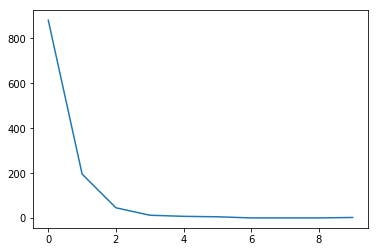

Window t= 50
8.056575012879684
0.0


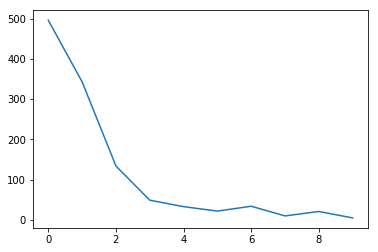

Window t= 100
13.732931097667855
0.0


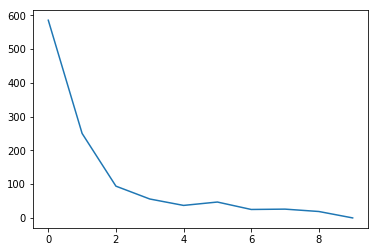

Window t= 200
15.270476249727803
0.0015943877551005906


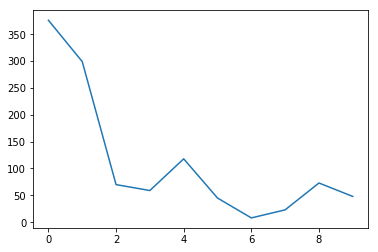

Window t= 250
18.16343671260148
0.0


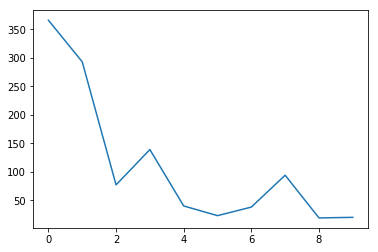

Working on... AMZN
Window t= 5
10.84056493694897
0.0


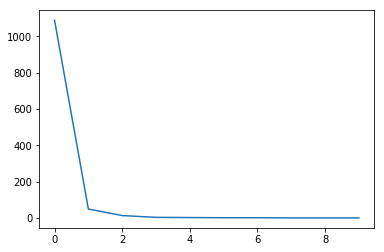

Window t= 50
15.010221797598133
0.0006830192074892061


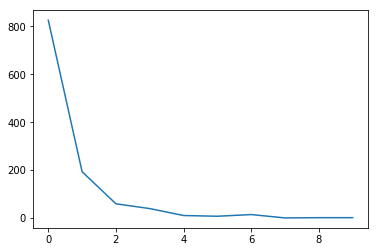

Window t= 100
14.486838606753517
0.00220500359416388


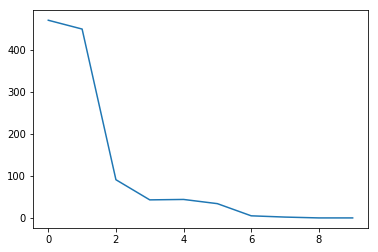

Window t= 200
16.553227978949998
0.0025179720253285087


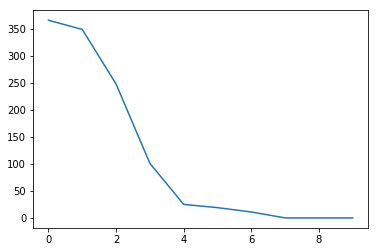

Window t= 250
17.29419872196466
0.0016534668116344382


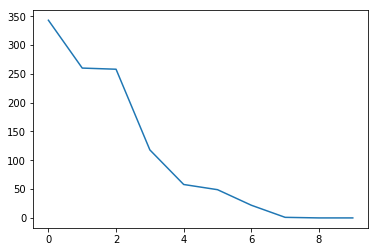

Working on... PEP
Window t= 5
3.8628652444866027
0.0


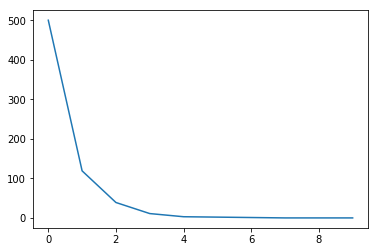

Window t= 50
6.416040100250632
0.0


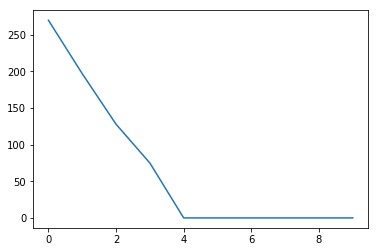

Window t= 100
7.222914072229142
0.0


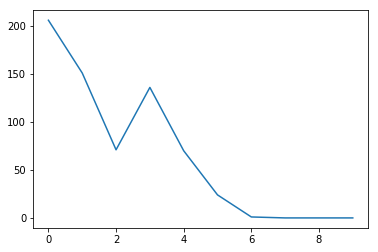

Window t= 200
9.173312245067837
0.0


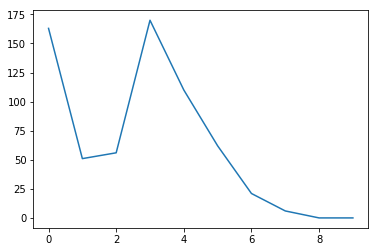

Window t= 250
9.97683653209795
0.0


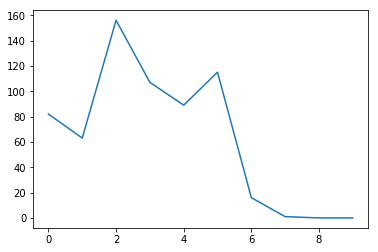

Working on... GOOGL
Window t= 5
6.319351696574711
0.0


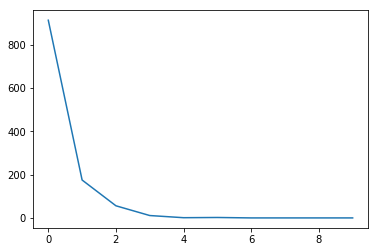

Window t= 50
8.24956997121787
0.0


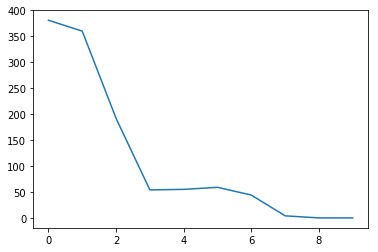

Window t= 100
12.38290755921766
0.00048405287792493946


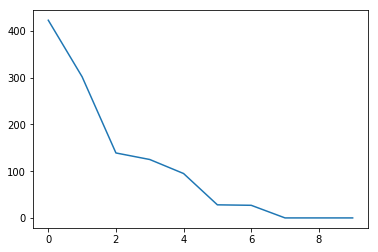

Window t= 200
15.572984786222369
0.0010669967243190858


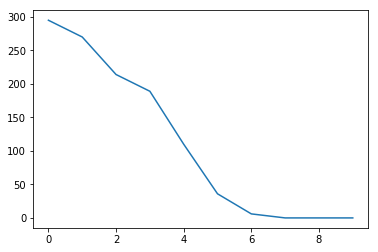

Window t= 250
16.068988068786844
0.0009662115810111313


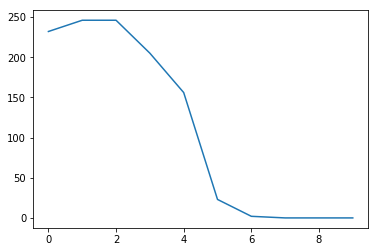

Working on... MSFT
Window t= 5
8.218596255264922
0.0


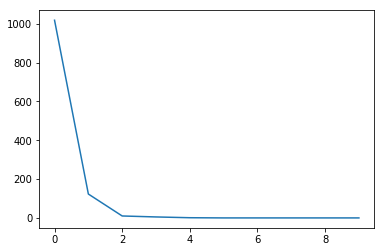

Window t= 50
8.63358466719623
0.0


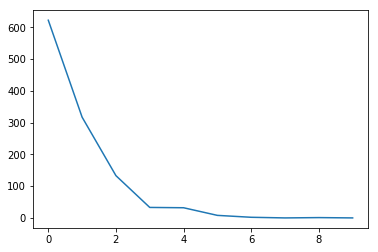

Window t= 100
8.842729970326412
0.0


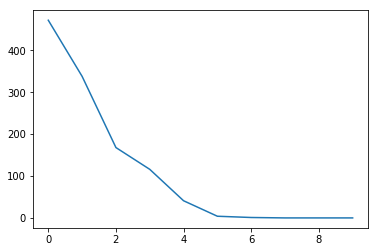

Window t= 200
10.621527329112286
0.0


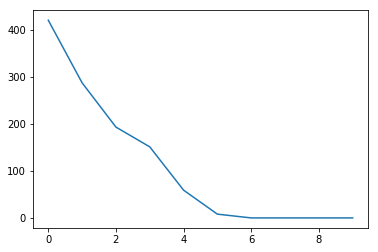

Window t= 250
11.56494894324388
0.0


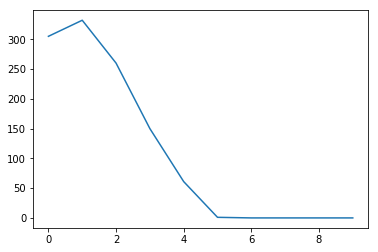

Working on... FB
Window t= 5
8.887813391777962
0.0


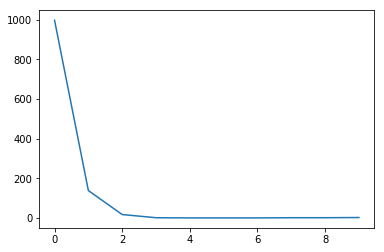

Window t= 50
11.963033295353847
0.0


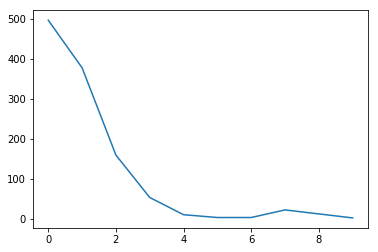

Window t= 100
11.490650141335077
0.0


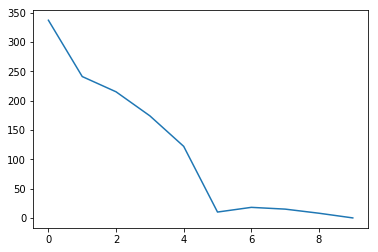

Window t= 200
18.18673883626522
0.0


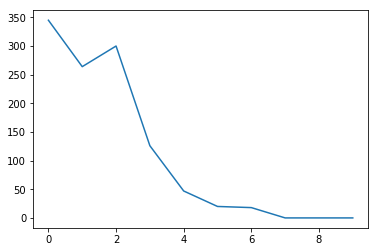

Window t= 250
18.883680836161847
0.0


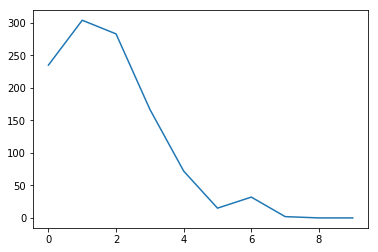

Working on... INTC
Window t= 5
8.841732979664014
0.0


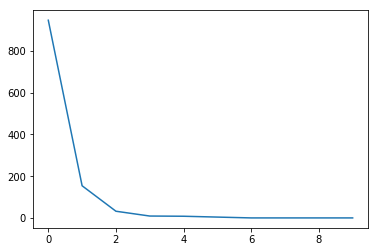

Window t= 50
11.917826375082825
0.0


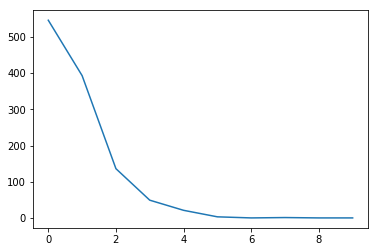

Window t= 100
12.540034491253994
0.0


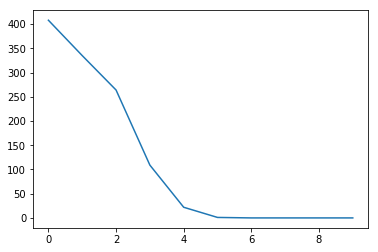

Window t= 200
15.679199161913631
0.0


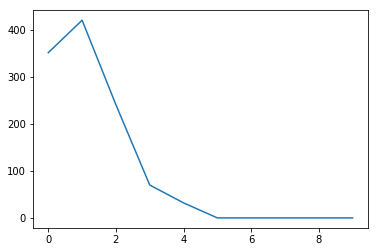

Window t= 250
17.204277049957682
0.0


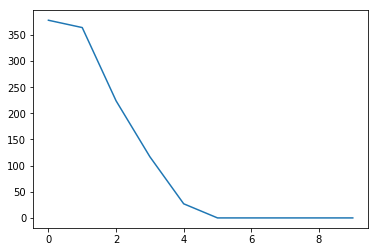

Working on... CSCO
Window t= 5
7.457238960853085
0.0


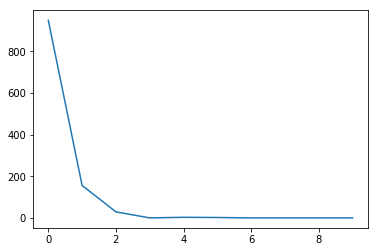

Window t= 50
11.359703337453643
0.0


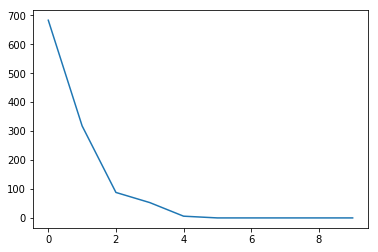

Window t= 100
14.717567361075748
0.0


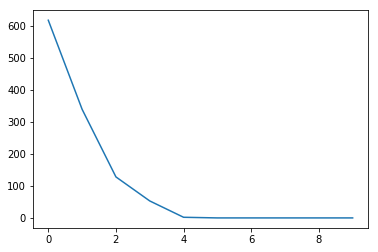

Window t= 200
14.77359938603223
0.0


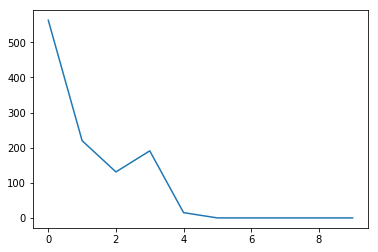

Window t= 250
17.31983166754338
0.0


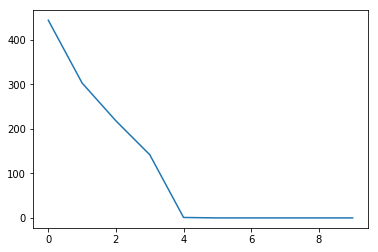

Working on... CMCSA
Window t= 5
6.3492063492063515
0.0


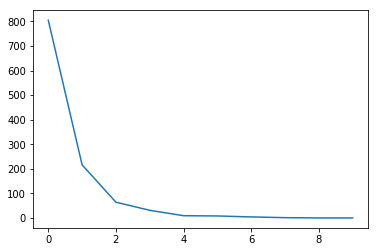

Window t= 50
9.483465427712487
0.0


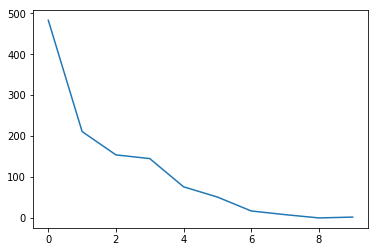

Window t= 100
13.259824710206404
0.0


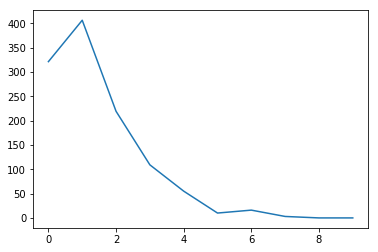

Window t= 200
11.797159290996593
0.0


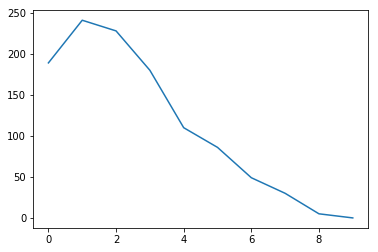

Window t= 250
12.326411960132894
0.0


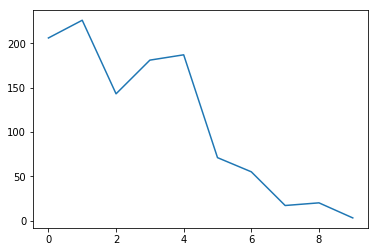

Working on... NVDA
Window t= 5
8.611215912484196
0.0


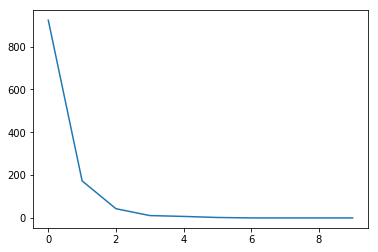

Window t= 50
13.307240704500973
0.0


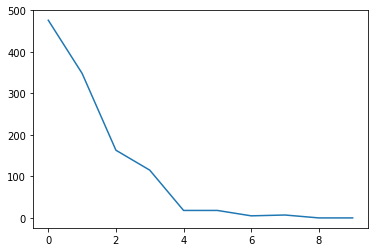

Window t= 100
17.32054505997941
0.0


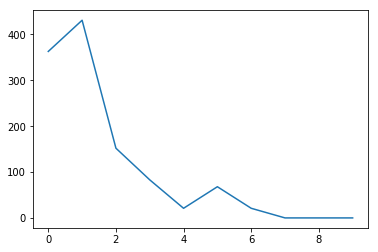

Window t= 200
20.802348336594903
0.0


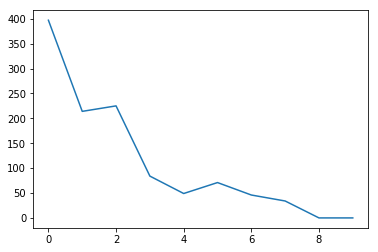

Window t= 250
23.020104681309004
0.0


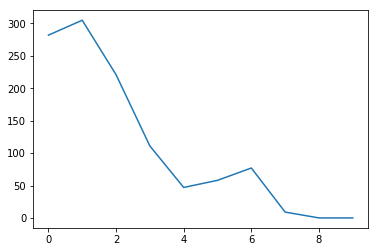

Working on... NFLX
Window t= 5
12.927941892909342
0.0


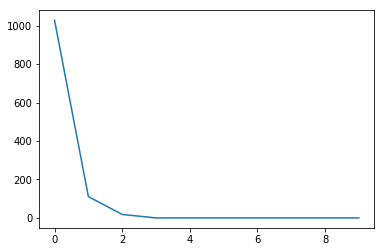

Window t= 50
15.595248889291856
0.0


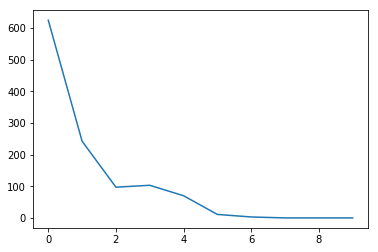

Window t= 100
23.442757115576974
0.0


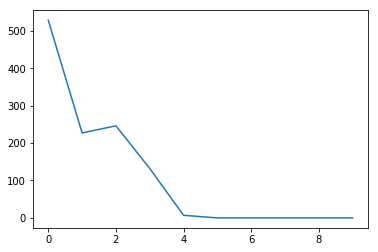

Window t= 200
31.588373054139684
0.0


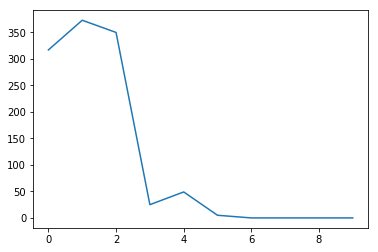

Window t= 250
29.537169489179096
0.004488014418465778


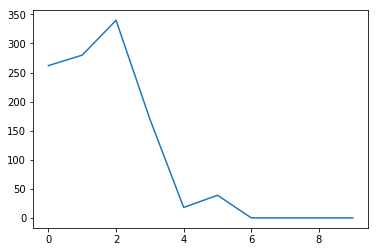

Working on... BKNG
Window t= 5
8.470925122769875
0.0


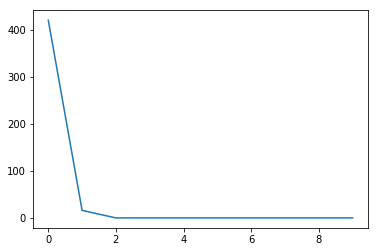

Window t= 50
9.807916492871726
0.0004705749484609155


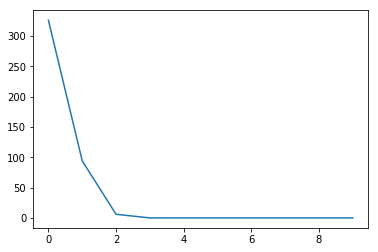

Window t= 100
8.511228457637502
0.00253931689794829


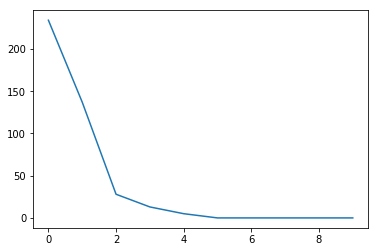

Window t= 200
15.331921583726379
0.0018669255470074874


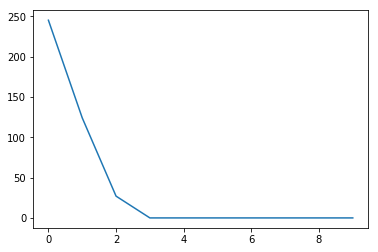

Window t= 250
17.14580592720934
0.0014042905757940254


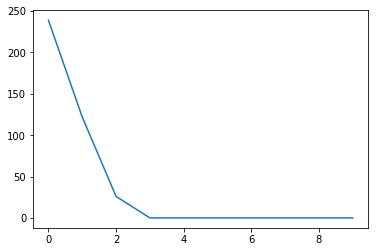

Working on... ADBE
Window t= 5
9.677207715522899
0.0


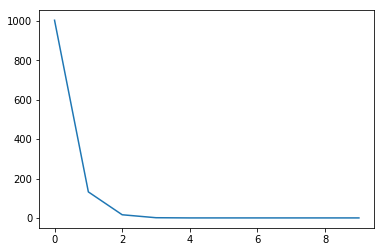

Window t= 50
15.274478754288733
0.0


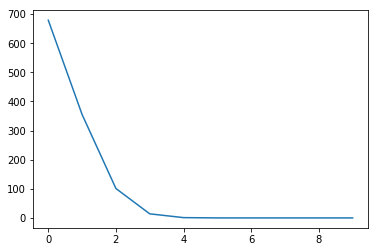

Window t= 100
18.363771143608062
0.0


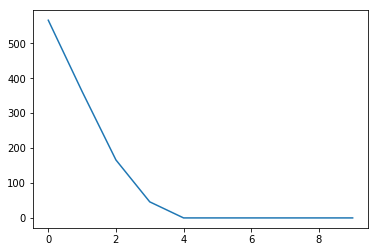

Window t= 200
18.44504021447722
0.0


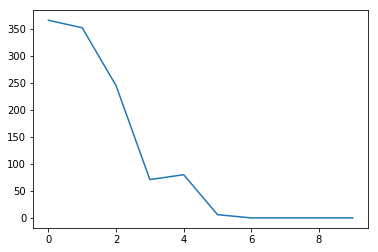

Window t= 250
18.402568733694554
0.0


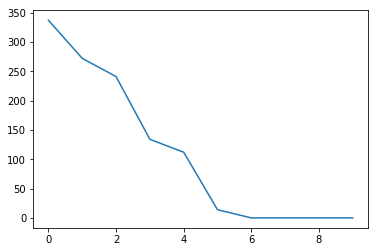

Working on... AMGN
Window t= 5
3.5536723163841764
0.0


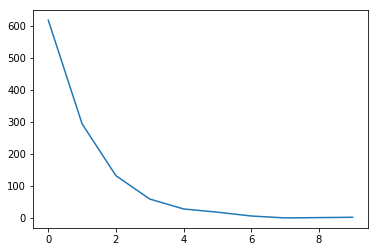

Window t= 50
8.963379393684654
0.0


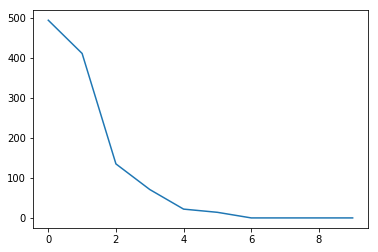

Window t= 100
7.711442786069657
0.0


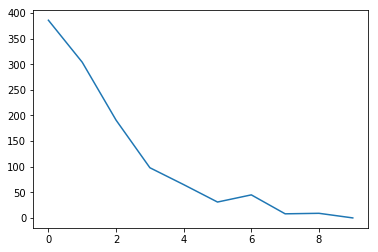

Window t= 200
11.732135394901801
0.00032367697037896973


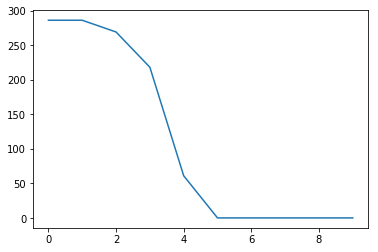

Window t= 250
14.735635620670749
0.0


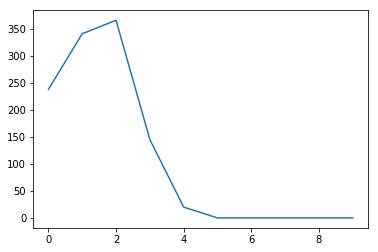

Working on... TXN
Window t= 5
6.729897599462817
0.0


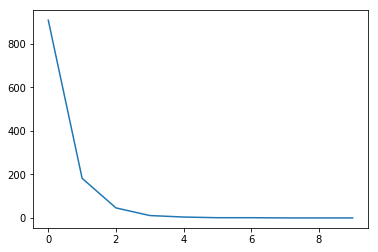

Window t= 50
8.615641990798828
0.0


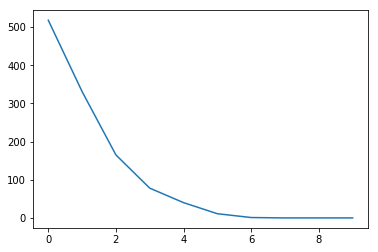

Window t= 100
9.999078425951533
0.0


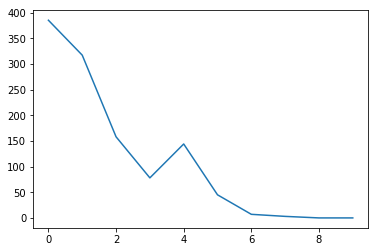

Window t= 200
11.88539087371772
0.0


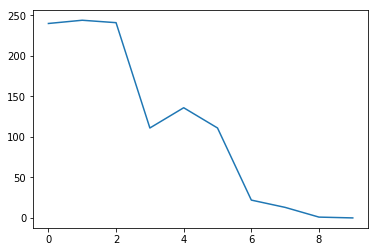

Window t= 250
13.887957061388787
0.0


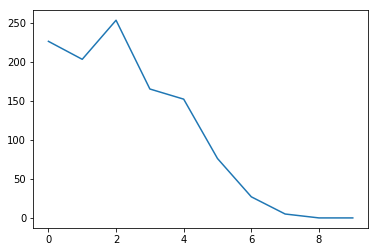

Working on... AVGO
Window t= 5
5.138899517869445
0.0


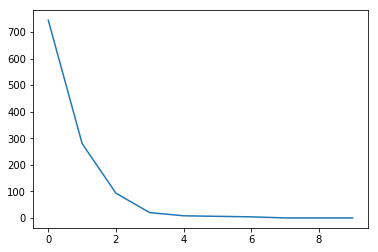

Window t= 50
9.162264712446989
0.0018939752646813207


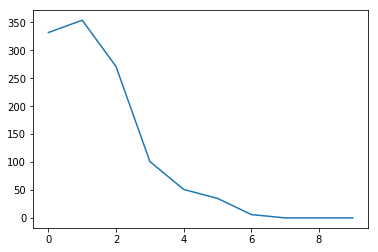

Window t= 100
10.454619388419003
0.0


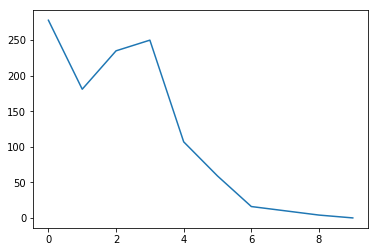

Window t= 200
14.315952293727353
0.0


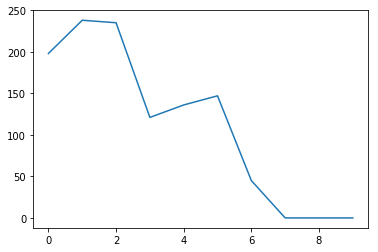

Window t= 250
14.843821562700368
0.0


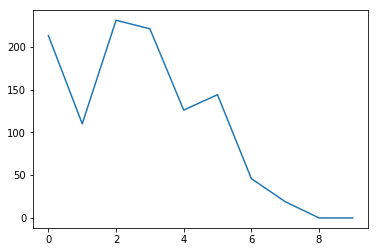

Working on... PYPL
Window t= 5
8.77808988764045
0.0


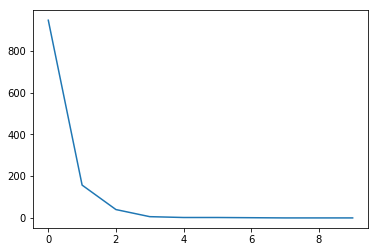

Window t= 50
10.098291598408608
0.0


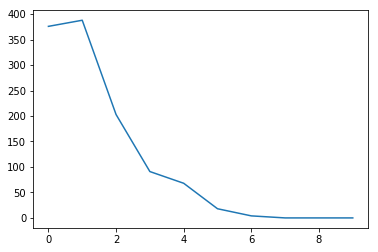

Window t= 100
14.608327452364152
0.0


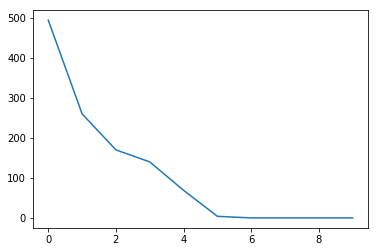

Window t= 200
15.966779740320495
0.0


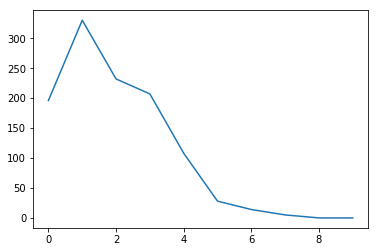

Window t= 250
14.960443972133668
0.0


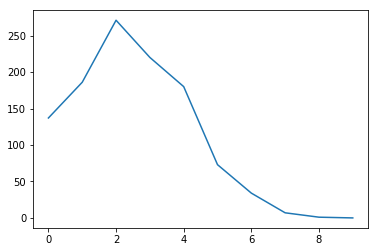

Working on... GILD
Window t= 5
7.556849694952859
0.0


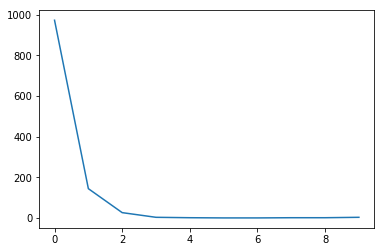

Window t= 50
11.64808523533821
0.0


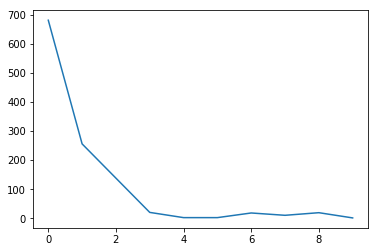

Window t= 100
13.437632934726103
0.0


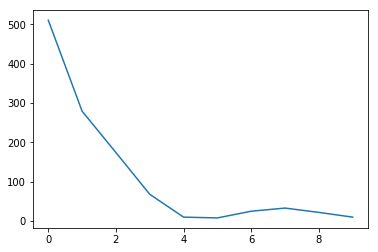

Window t= 200
15.591027934498413
0.0


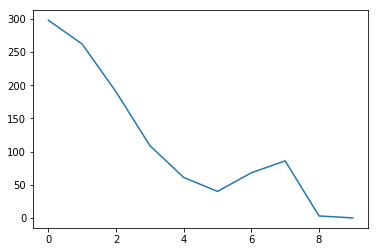

Window t= 250
16.54043819312957
0.0


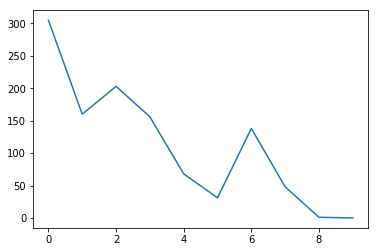

Working on... COST
Window t= 5
5.41010125217183
0.0


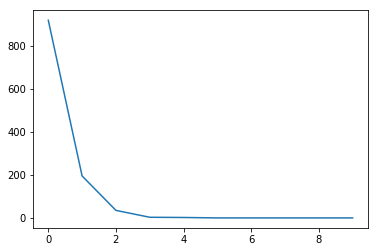

Window t= 50
7.569947876100888
0.0


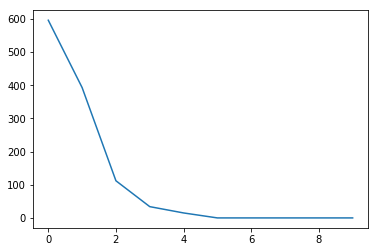

Window t= 100
9.494827486563024
0.0


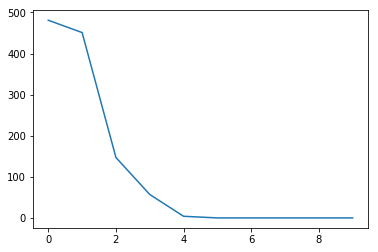

Window t= 200
10.930806833644105
0.0


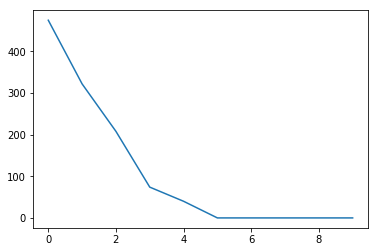

Window t= 250
11.230868092066828
0.0


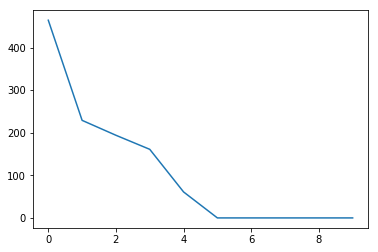

Working on... QCOM
Window t= 5
13.945454545454549
0.0


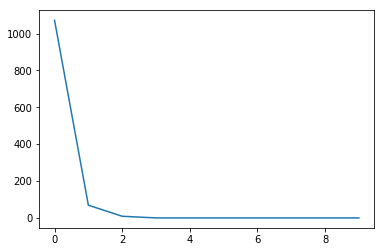

Window t= 50
18.760659465605453
0.0


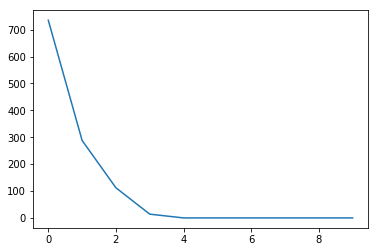

Window t= 100
26.662742789876408
0.0


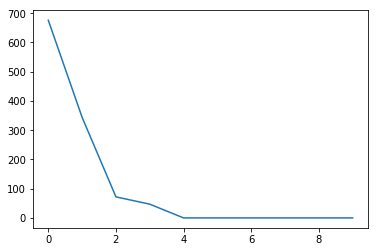

Window t= 200
28.477470079774054
0.0


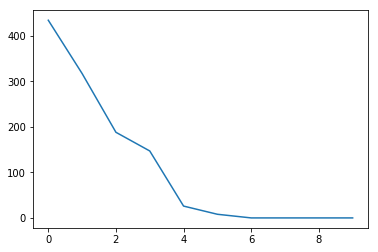

Window t= 250
32.931446791550414
0.0


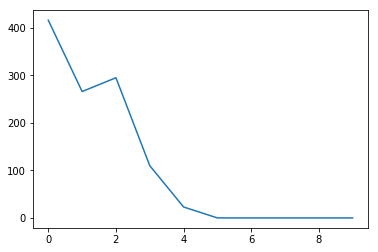

IndexError: list index out of range

In [10]:
o=0
distributioncharts=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[5,50,100,200,250]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    timecharts=[]
    for t in trendwindowtime:
        
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        print('Window t=',t)
        print(max(yvolatility))
        print(min(yvolatility))
        step=(max(yvolatility)-min(yvolatility))/10
        distribution=np.zeros(10)
        for r in range(0,len(y_test)):
            for v in range(0,10):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    distribution[v]+=1
        plt.plot(distribution)
        plt.show()
        timecharts.append(distribution)
    distributioncharts.append(timecharts)
for t in range(0,len(distributioncharts[o])):
    print('Chart for window: ',trendwindowtime[t])
    for s in range(0,distributioncharts):
        plt.plot(distributioncharts[s][o])
    plt.show()    
        
        

        

Chart for window:  5
[437. 103. 258. 334. 162. 208. 297. 236. 544. 330. 147.  16. 167. 999.
 334. 612. 279. 251. 282.  87.]


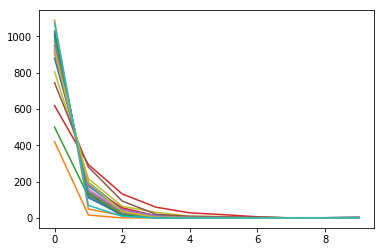

Chart for window:  50
[1487.  604.  678. 1713.  870. 1240.  918.  677. 1689. 1260. 1098.  106.
  603. 1052. 1116. 1614. 1453.  949.  779.  554.]


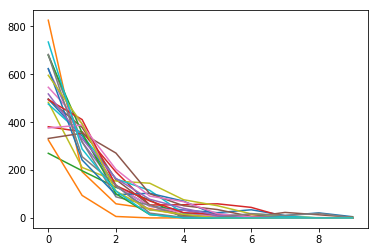

Chart for window:  100
[1473. 1151. 1107. 1637. 1212. 2008. 1283.  762. 1558. 1534. 1143.  252.
  832. 1793. 1731. 2322. 1316. 1558.  932.  629.]


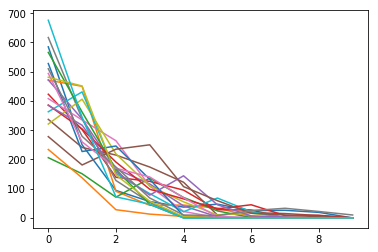

Chart for window:  200
[2538. 1409. 1591. 1921. 1402. 1638. 1241. 1115. 2651. 1981. 1369.  178.
 1405. 1722. 2389. 2620. 2106. 2447. 1120. 1278.]


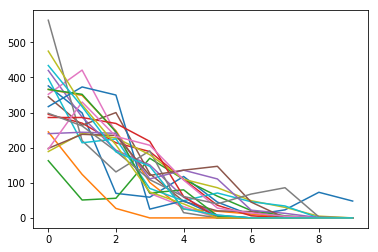

Chart for window:  250
[2357. 1746. 1730. 2104. 1551. 1940. 1271. 1169. 2794. 2083. 1737.  174.
 1674. 1588. 2389. 2868. 2734. 2633. 1344. 1278.]


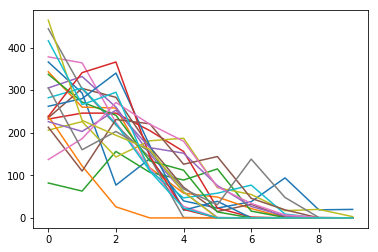

In [14]:

for t in range(0,len(distributioncharts[0])):
    print('Chart for window: ',trendwindowtime[t])
    stock=np.zeros(20)
    for s in range(0,len(distributioncharts)):
        plt.plot(distributioncharts[s][t])
        for h in range(0,len(distributioncharts[s][t])):
            stock[s]+=distributioncharts[s][t][h]*h
    print(stock)
    plt.show()   